In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Работа с Pandas

1. Загрузите ваш DataFrame в переменную df и выведете на экран первые пять строк 

In [2]:
df = pd.read_csv('data/lab_rab_2_googleplaystore.csv') 
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type  Price Content Rating  \
0     159   19M      10,000+  Free    0.0       Everyone   
1     967   14M     500,000+  Free    0.0       Everyone   
2   87510  8.7M   5,000,000+  Free    0.0       Everyone   
3  215644   25M  50,000,000+  Free    0.0           Teen   
4     967  2.8M     100,000+  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pr

2. Отобразите количество строк и столбцов в DataFrame

In [3]:
df.shape

(10841, 13)

3. Выведете основную информацию о DataFrame методом info(). Проанализируйте есть ли пропуски в столбцах. Напишите вывод о том, какие столбцы содержат пропуски

In [4]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Pr

*column with NaN values*:
- Rating: 1474 float64
- Type: 1 object
- Content Rating: 1 object
- Current Ver: 8 object
- Android Ver: 3 object


вообще будет хорошо заменить NaN значения в Рейтинге, но возможно мы средними значениями сломаем весь дата-сет

In [5]:
def count_mean(name):
    # Подсчет количества каждого значения
    review_counts = df[name].value_counts()
    # Вывод всех значений и их количества
    print("Значения и количество:")
    print(review_counts)
    # Вывод среднего значения
    print(f'Среднее: {df[name].mean()}')

In [6]:
count_mean('Rating')

Значения и количество:
Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64
Среднее: 4.193338315362443


и вот теперь надо подумать, 4.2 - среднее по Рейтингу, мы добавим почти 1400 новых вхождений для 4.1

Оригинальное среднее: 4.193338315362443
Новое среднее: 4.193338315362443


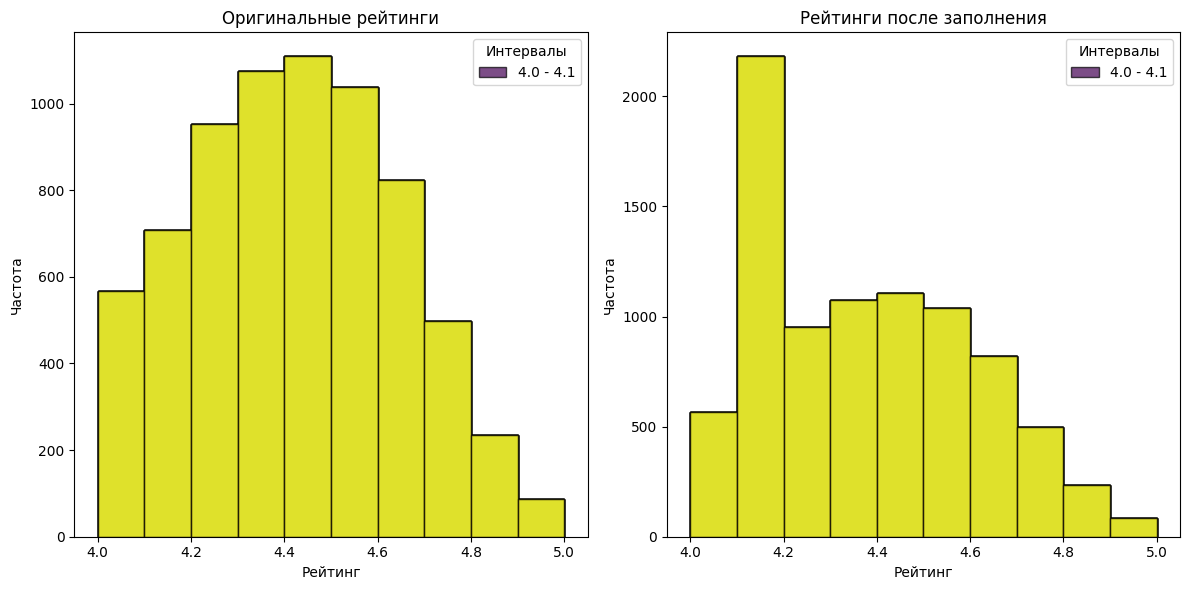

In [7]:
def analyze_ratings(df, column_name, filled_ratings=None, print_mean=True):
    # Копируем оригинальные данные
    rating_copy = df[column_name].copy()

    # Если заполненные рейтинги не переданы, заполняем пропущенные значения
    if filled_ratings is None:
        filled_ratings = rating_copy.fillna(rating_copy.mean())

    # Сравнение средних значений
    original_mean = rating_copy.mean()
    new_mean = filled_ratings.mean()
    
    if print_mean is True:
        print(f'Оригинальное среднее: {original_mean}')
        print(f'Новое среднее: {new_mean}')

    # Построение графиков для сравнения
    plt.figure(figsize=(12, 6))

    # Определяем количество интервалов для гистограммы
    bins = np.arange(4.0, 5.1, 0.1)  # Интервалы от 4.0 до 5.0 с шагом 0.1
    colors = plt.cm.viridis(np.linspace(0, 1, len(bins) - 1))  # Генерация цветов

    # Гистограмма для оригинальных рейтингов
    plt.subplot(1, 2, 1)
    for i in range(len(bins) - 1):
        plt.hist(rating_copy.dropna(), bins=bins, color=colors[i], alpha=0.7, 
                 edgecolor='black', label=f'{bins[i]:.1f} - {bins[i+1]:.1f}' if i == 0 else "")
    plt.title('Оригинальные рейтинги')
    plt.xlabel('Рейтинг')
    plt.ylabel('Частота')
    plt.legend(title='Интервалы')

    # Гистограмма для рейтингов после заполнения
    plt.subplot(1, 2, 2)
    for i in range(len(bins) - 1):
        plt.hist(filled_ratings, bins=bins, color=colors[i], alpha=0.7, 
                 edgecolor='black', label=f'{bins[i]:.1f} - {bins[i+1]:.1f}' if i == 0 else "")
    plt.title('Рейтинги после заполнения')
    plt.xlabel('Рейтинг')
    plt.ylabel('Частота')
    plt.legend(title='Интервалы')

    plt.tight_layout()
    plt.show()

analyze_ratings(df, 'Rating')

4. Удалите или замените пропуски известными вам методами. (Подсказка: `dropna()` или `fillna()`, выбор того или иного метода должен быть аргументирован).

Оригинальное среднее: 4.193338315362443
Новое среднее: 4.474882077729781


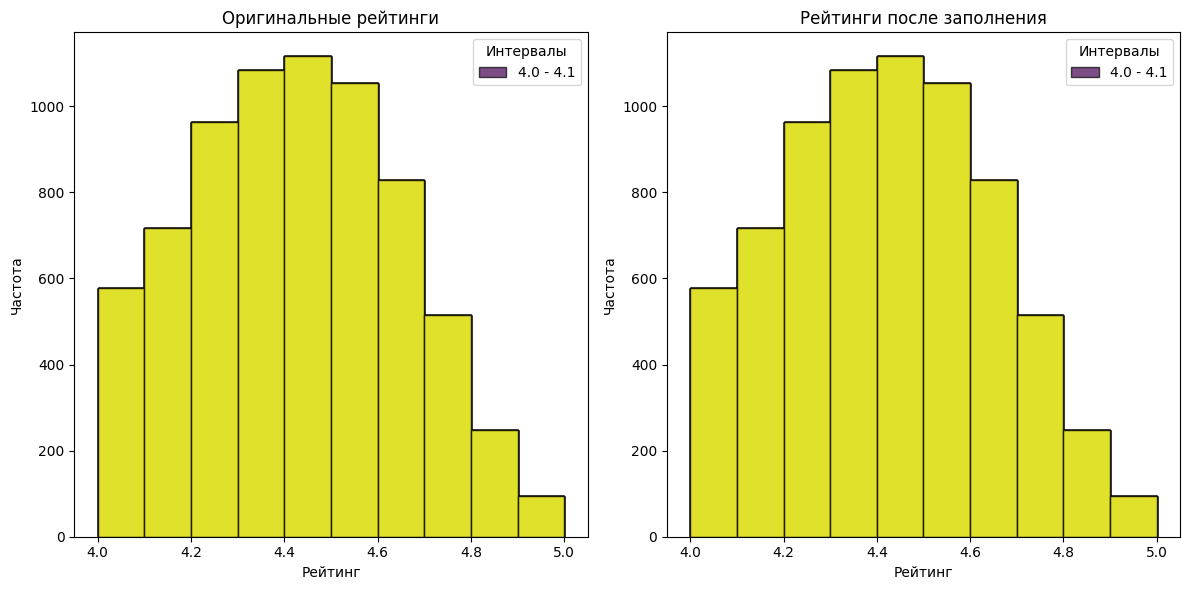

In [8]:
# Копируем оригинальные данные
rating_copy = df['Rating'].copy()

# Находим топ-10 значений
top_n = df['Rating'].nlargest(10)

# Определяем количество NaN значений
num_nan = df['Rating'].isna().sum()

# Генерируем случайные значения с нормальным распределением
mean_top = top_n.mean()
std_top = top_n.std()

# Генерируем значения для заполнения NaN
random_values = np.random.normal(loc=mean_top, scale=std_top, size=num_nan)

# Заполняем NaN значениями из random_values
nan_indices = df['Rating'].index[df['Rating'].isna()]
df.loc[nan_indices, 'Rating'] = random_values

original_mean = rating_copy.mean()
new_mean = df['Rating'].mean()
print(f'Оригинальное среднее: {original_mean}')
print(f'Новое среднее: {new_mean}')

# Выводим результаты
analyze_ratings(df, 'Rating', df['Rating'], print_mean=False)

Теперь Рейтинги заполнены нормально, а не 1400 значений в 4.19 :)

In [9]:
# для других невозможно будет заменить средними значениями, поэтому удалим
df.dropna(subset=['Type'], inplace=True)
df.dropna(subset=['Content Rating'], inplace=True)
df.dropna(subset=['Current Ver'], inplace=True)
df.dropna(subset=['Android Ver'], inplace=True)

5. Проверьте нет ли пропусков после произведенной обработки

In [10]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


6. Выведите на экран минимум и максимум из столбца `Price`:

In [11]:
print(f'Price\nMIN      MAX\n{df["Price"].min()}      {df["Price"].max()}')

Price
MIN      MAX
0.0      400.0


7. Выведите на экран медиану и среднее арифметическое столбцов:
 - Rating
 - Reviews

In [12]:
# Подсчет количества каждого значения
review_counts = df["Reviews"].value_counts()

# Вывод всех значений и их количества
print("Значения и количество:")
print(review_counts)
df["Reviews"] = pd.to_numeric(df["Reviews"], errors='coerce')
print(f'                    {"RATING":<20}    {"REVIEWS":<20}')
print(f'{"Среднее":<20}{df["Rating"].mean():<20}{df["Reviews"].mean():<20}')
print(f'{"Медиана":<20}{df["Rating"].median():<20}{df["Reviews"].median():<20}')

Значения и количество:
Reviews
0        594
1        271
2        214
3        175
4        137
        ... 
885        1
88486      1
603        1
1195       1
1287       1
Name: count, Length: 5999, dtype: int64
                    RATING                  REVIEWS             
Среднее             4.472096892245822   444601.76673746423  
Медиана             4.3                 2100.0              


8. Выведите на экран все уникальные значения категориального столбца Genres

In [13]:
# Получение уникальных жанров
unique_genres = df['Genres'].unique()


print("\nУникальные жанры:")
genre_df = pd.DataFrame(unique_genres, columns=['Genres'])
print(genre_df.to_string(index=False))


Уникальные жанры:
                               Genres
                         Art & Design
            Art & Design;Pretend Play
              Art & Design;Creativity
      Art & Design;Action & Adventure
                      Auto & Vehicles
                               Beauty
                    Books & Reference
                             Business
                               Comics
                    Comics;Creativity
                        Communication
                               Dating
                  Education;Education
                            Education
                 Education;Creativity
              Education;Music & Video
         Education;Action & Adventure
               Education;Pretend Play
                Education;Brain Games
                        Entertainment
          Entertainment;Music & Video
            Entertainment;Brain Games
             Entertainment;Creativity
                               Events
                              F

9. Сгруппируйте данные по столбцу `Genres` и посчитайте для каждого жанра средний и медианный рейтинг. Представьте результат в виде нового DataFrame,который будет сохранен в переменную `grouped_df`, где одна колонка будет содержать названия жарнов, а две другие буду содержать в себе средний и медианный рейтинги. Напишите краткий вывод.

In [14]:
grouped_df = df.groupby('Genres')['Rating'].agg(['mean', 'median']).reset_index()
grouped_df.columns = ['Genres', 'Average_Rating', 'Median_Rating']
print(grouped_df)

                                    Genres  Average_Rating  Median_Rating
0                                   Action        4.327638            4.3
1                Action;Action & Adventure        4.311765            4.3
2                                Adventure        4.178508            4.3
3             Adventure;Action & Adventure        4.423077            4.5
4                    Adventure;Brain Games        4.600000            4.6
..                                     ...             ...            ...
114                Video Players & Editors        4.187217            4.2
115     Video Players & Editors;Creativity        4.100000            4.1
116  Video Players & Editors;Music & Video        4.000000            4.0
117                                Weather        4.452844            4.4
118                                   Word        4.671103            4.4

[119 rows x 3 columns]


10. Из получившегося датафрейма выведите на экран только те жанры, чей медианный рейтинг больше 4.5. Напишите краткий вывод.

In [15]:
high_median_genres = grouped_df[grouped_df['Median_Rating'] > 4.5]
print(high_median_genres)

                              Genres  Average_Rating  Median_Rating
4              Adventure;Brain Games        4.600000       4.600000
10   Art & Design;Action & Adventure       10.005739      10.005739
11           Art & Design;Creativity        4.400000       4.700000
18                Board;Pretend Play        4.800000       4.800000
35                 Comics;Creativity        4.800000       4.800000
55          Entertainment;Creativity        4.533333       4.600000
64        Health & Fitness;Education        4.700000       4.700000
74               Music;Music & Video        4.533333       4.600000
78               Parenting;Education        7.808052       6.122517
87                  Puzzle;Education        4.600000       4.600000
105      Strategy;Action & Adventure        4.600000       4.600000
113                 Trivia;Education        7.790535       7.790535


11. Выведете кол-во дубликатов в основном DataFrame (df) и удалите их 

In [16]:
duplicates_count = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates_count}')
df.drop_duplicates(inplace=True)

Количество дубликатов: 474


12. Посчитатайте какое количество приложений содержится в каждом жанре (value_counts).В получившемся Series выведите на экран 10 строк с наибольшим количеством приложений отсортированных по убыванию.

In [17]:
app_counts = df['Genres'].value_counts()
print(app_counts.head(10)) # по умолчанию сортируется на уменьшение

Genres
Tools              840
Entertainment      587
Education          526
Business           427
Medical            415
Productivity       407
Personalization    386
Lifestyle          372
Communication      366
Sports             364
Name: count, dtype: int64
